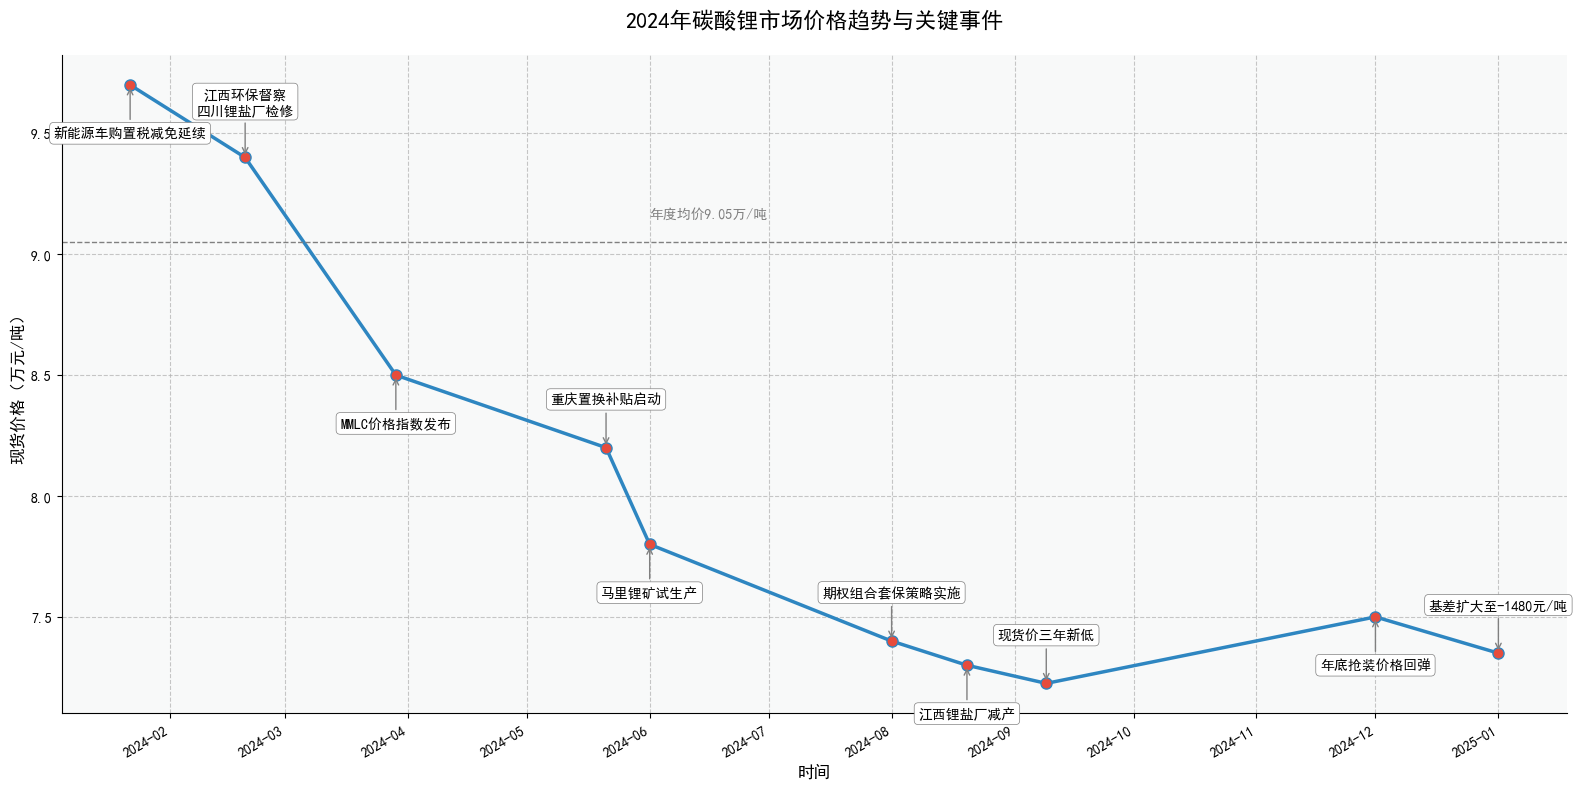

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei'] #设置能显示中文
plt.rcParams['axes.unicode_minus'] = False #设置负号

# 数据准备
dates = [
    '2024-01-22', '2024-02-20', '2024-03-29', '2024-05-21',
    '2024-06-01', '2024-08-01', '2024-08-20', '2024-09-09',
    '2024-12-01', '2025-01-01'
]
prices = [
    9.7, 9.4, 8.5, 8.2,
    7.8, 7.4, 7.3, 7.225,
    7.5, 7.35
]

# 转换日期格式
date_objs = [datetime.strptime(d, '%Y-%m-%d') for d in dates]

# 创建画布
plt.figure(figsize=(16, 8), dpi=100)
plt.plot(date_objs, prices, marker='o', color='#2E86C1', linewidth=2.5, markersize=8, markerfacecolor='#E74C3C')

# 添加事件标注
events = {
    '2024-01-22': '新能源车购置税减免延续',
    '2024-02-20': '江西环保督察\n四川锂盐厂检修',
    '2024-03-29': 'MMLC价格指数发布',
    '2024-05-21': '重庆置换补贴启动',
    '2024-06-01': '马里锂矿试生产',
    '2024-08-01': '期权组合套保策略实施',
    '2024-08-20': '江西锂盐厂减产',
    '2024-09-09': '现货价三年新低',
    '2024-12-01': '年底抢装价格回弹',
    '2025-01-01': '基差扩大至-1480元/吨'
}

# 自动调整标注位置
for i, (date, label) in enumerate(events.items()):
    d = datetime.strptime(date, '%Y-%m-%d')
    y_offset = -1.5 if i % 2 == 0 else 1.5  # 交替标注位置
    plt.annotate(label, xy=(d, prices[i]),
                 xytext=(0, y_offset*20), 
                 textcoords='offset points',
                 ha='center', va='bottom' if i%2 else 'top',
                 arrowprops=dict(arrowstyle="->", color='gray'),
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="grey", lw=0.5))

# 图表美化
plt.title('2024年碳酸锂市场价格趋势与关键事件', fontsize=16, pad=20)
plt.xlabel('时间', fontsize=12)
plt.ylabel('现货价格（万元/吨）', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=30)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

# 添加辅助元素
plt.axhline(y=9.05, color='grey', linestyle='--', linewidth=1, label='年度均价')
plt.text(datetime(2024,6,1), 9.15, '年度均价9.05万/吨', color='grey')

# 设置颜色主题
plt.gca().set_facecolor('#F8F9F9')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()